In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv('heart_disease.csv')

In [4]:
# Handle missing values
data.dropna(inplace=True)

In [5]:
# Check the distribution of the target variable
print(data['target'].value_counts())

target
1    30
Name: count, dtype: int64


In [6]:
# Simulate data for the missing class (target = 0)
if len(data['target'].value_counts()) == 1:
    # Assuming 'target' = 1 exists, we will create synthetic data for 'target' = 0
    num_samples = data['target'].value_counts().values[0]  # Number of samples to generate
    synthetic_data = data.copy()
    synthetic_data['target'] = 0  # Set target to 0

In [9]:
  # Randomize numerical features slightly
numerical_features = ['age', 'chol', 'trestbps', 'thalach', 'oldpeak']

# Loop through each numerical feature
for feature in numerical_features:
    # Multiply each feature by a random value between 0.9 and 1.1
    # np.random.uniform(0.9, 1.1, size=num_samples) generates an array of random numbers
    # between 0.9 and 1.1, where num_samples is the number of rows in synthetic_data
    synthetic_data[feature] = synthetic_data[feature] * np.random.uniform(0.9, 1.1, size=num_samples)

In [12]:
  # Combine original and synthetic data
  data = pd.concat([data, synthetic_data], ignore_index=True)

In [13]:
# Encode categorical variables (sex column)
data = pd.get_dummies(data, columns=['sex'], drop_first=True)

In [14]:
# Scale numerical features
scaler = StandardScaler()
numerical_features = ['age', 'chol', 'trestbps']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

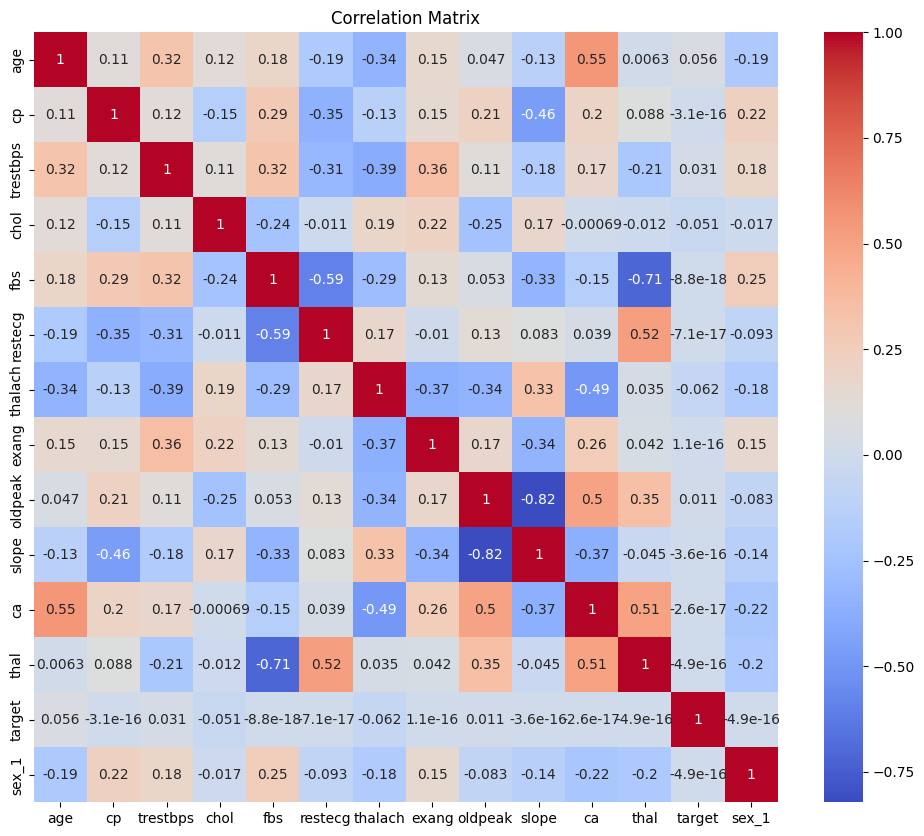

In [16]:
# Perform basic exploratory data analysis
# Visualize correlations
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
# Split the data into training and testing sets
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Train a logistic regression model if there are at least two classes in the target variable
if len(np.unique(y_train)) > 1 and len(np.unique(y_test)) > 1:
    model = LogisticRegression(penalty='l1', solver='liblinear')
    model.fit(X_train, y_train)

In [20]:
    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

In [21]:
 print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-score: {f1}, ROC-AUC: {roc_auc}')

Accuracy: 0.4444444444444444, Precision: 0.0, Recall: 0.0, F1-score: 0.0, ROC-AUC: 0.4


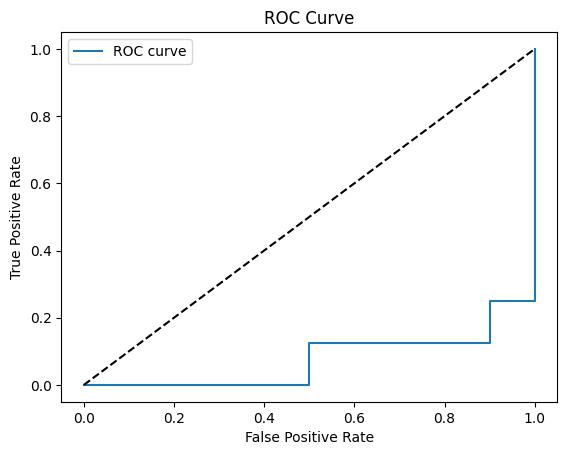

In [22]:

    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()

In [24]:
# Interpret the coefficients
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_[0]})
print(coefficients)

     feature  coefficient
0        age     0.083799
1         cp    -0.120359
2   trestbps     0.000000
3       chol    -0.296991
4        fbs     0.000000
5    restecg     0.000000
6    thalach    -0.006333
7      exang     0.000000
8    oldpeak     0.000000
9      slope     0.304958
10        ca    -0.163519
11      thal     0.000000
12     sex_1     0.000000


In [27]:
    # Calculate odds ratios
# Assuming 'coefficients' is a dictionary or a DataFrame containing coefficients
# and 'coefficient' is the key or column name for coefficients

# Check if coefficients and odds_ratios can be calculated
if len(coefficients) >= 2:
    # Calculate odds ratios
    odds_ratios = np.exp(coefficients['coefficient'])
    print(odds_ratios)
else:
    print("The target variable does not contain at least two classes.")

0     1.087410
1     0.886602
2     1.000000
3     0.743051
4     1.000000
5     1.000000
6     0.993687
7     1.000000
8     1.000000
9     1.356568
10    0.849151
11    1.000000
12    1.000000
Name: coefficient, dtype: float64
